In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
# Load datasets
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [3]:
# Display the head of each dataset
print("Train Transaction Head:")
train_transaction.head(10)

Train Transaction Head:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
print("Train Identity Head:")
train_identity.head(10)

Train Identity Head:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [5]:
print("Test Transaction Head:")
test_transaction.head(10)

Test Transaction Head:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [6]:
print("Test Identity Head:")
test_identity.head(10)

Test Identity Head:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
5,3663622,-5.0,36786.0,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-480.0,New,NotFound,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
6,3663624,-5.0,12577.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
7,3663626,-5.0,44726.0,0.0,0.0,0.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
8,3663629,-5.0,125997.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
9,3663658,-5.0,98741.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,Found,27.0,-360.0,New,NotFound,166.0,NaN,529.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2048x1536,match_status:2,T,F,F,F,mobile,iOS Device


In [7]:
# Display initial information to confirm data is loaded correctly
print("Train Transaction Shape:", train_transaction.shape)
print("Train Identity Shape:", train_identity.shape)
print("Test Transaction Shape:", test_transaction.shape)
print("Test Identity Shape:", test_identity.shape)

Train Transaction Shape: (590540, 394)
Train Identity Shape: (144233, 41)
Test Transaction Shape: (506691, 393)
Test Identity Shape: (141907, 41)


In [8]:
# Display a quick summary of numeric and categorical features for each dataset
numeric_features_train_transaction = train_transaction.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_train_transaction = train_transaction.select_dtypes(include=['object']).columns.tolist()

numeric_features_train_identity = train_identity.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_train_identity = train_identity.select_dtypes(include=['object']).columns.tolist()

numeric_features_test_transaction = test_transaction.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_test_transaction = test_transaction.select_dtypes(include=['object']).columns.tolist()

numeric_features_test_identity = test_identity.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_test_identity = test_identity.select_dtypes(include=['object']).columns.tolist()

# Create a summary table of numeric and categorical features
summary_df = pd.DataFrame({
    'Dataset': [
        'Train Transaction', 'Train Identity', 'Test Transaction', 'Test Identity'
    ],
    'Numeric Features': [
        len(numeric_features_train_transaction), len(numeric_features_train_identity), 
        len(numeric_features_test_transaction), len(numeric_features_test_identity)
    ],
    'Categorical Features': [
        len(categorical_features_train_transaction), len(categorical_features_train_identity), 
        len(categorical_features_test_transaction), len(categorical_features_test_identity)
    ]
})

summary_df

,Dataset,Numeric Features,Categorical Features
0,Train Transaction,380,14
1,Train Identity,24,17
2,Test Transaction,379,14
3,Test Identity,24,17


In [9]:
# Check for missing values and data types in the datasets
print("\nMissing Values in Train Transaction Dataset:\n")
print(train_transaction.isnull().sum())
print("\nData Types in Train Transaction Dataset:\n")
print(train_transaction.dtypes)

print("\nMissing Values in Train Identity Dataset:\n")
print(train_identity.isnull().sum())
print("\nData Types in Train Identity Dataset:\n")
print(train_identity.dtypes)


Missing Values in Train Transaction Dataset:

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

Data Types in Train Transaction Dataset:

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

Missing Values in Train Identity Dataset:

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10       

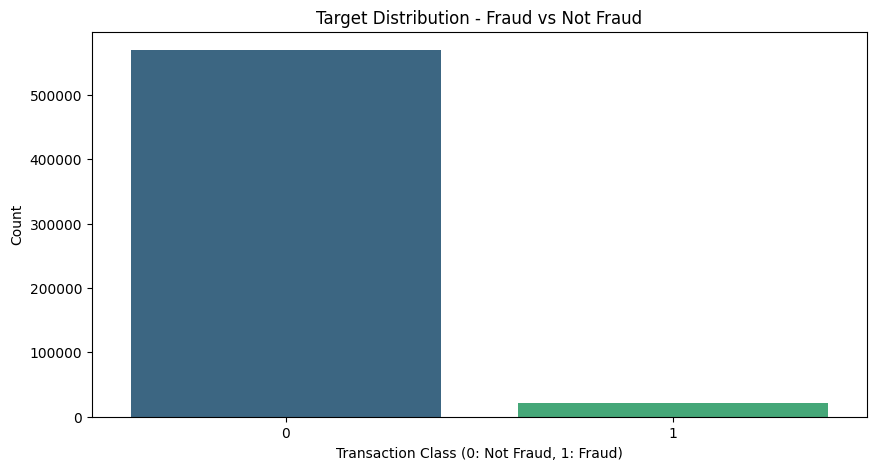

In [10]:
# Check target distribution for class imbalance
target_counts = train_transaction['isFraud'].value_counts()

# Plot the target distribution to understand the class imbalance
plt.figure(figsize=(10, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Target Distribution - Fraud vs Not Fraud')
plt.xlabel('Transaction Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [11]:
# Display target distribution in numbers
print("Target Variable Distribution:")
print(target_counts)
print("\nPercentage of Fraudulent Transactions:")
print((target_counts[1] / target_counts.sum()) * 100, "%")

Target Variable Distribution:
isFraud
0    569877
1     20663
Name: count, dtype: int64

Percentage of Fraudulent Transactions:
3.4990009144173126 %


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


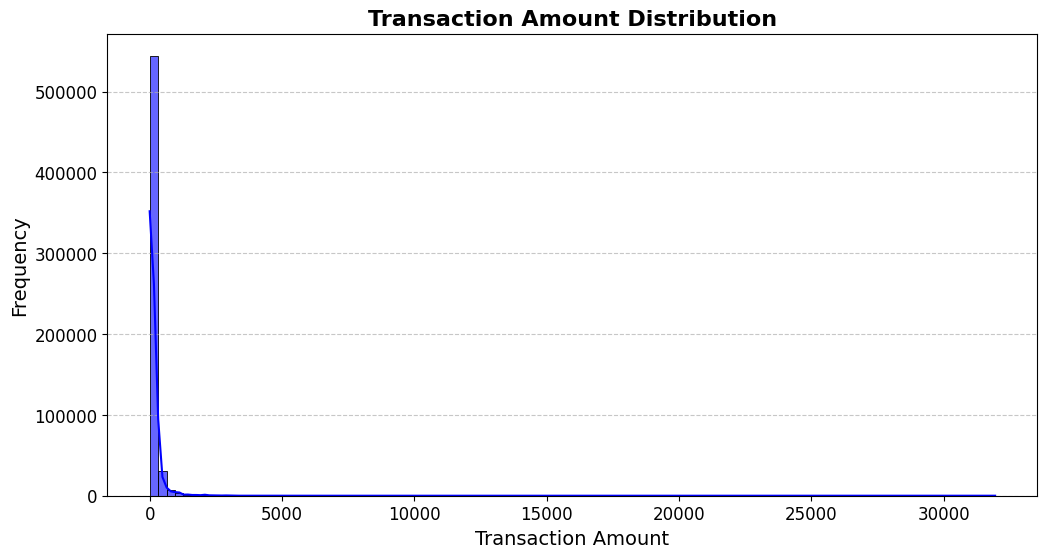

In [12]:
# Plot distribution for Transaction Amount
plt.figure(figsize=(12, 6))
sns.histplot(train_transaction['TransactionAmt'], bins=100, kde=True, color='blue', edgecolor='black', alpha=0.6)
plt.title('Transaction Amount Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

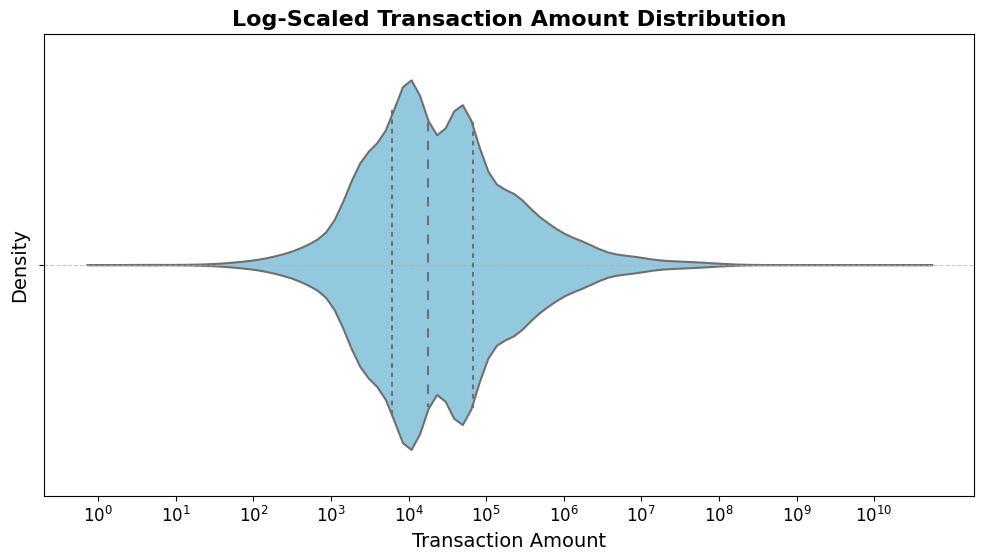

In [13]:
# Plot distribution for Log of Transaction Amount
plt.figure(figsize=(12, 6))
sns.violinplot(x=np.log1p(train_transaction['TransactionAmt']), color='skyblue', inner='quartile', bw=0.2)
plt.title('Log-Scaled Transaction Amount Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=np.arange(0, np.log1p(train_transaction['TransactionAmt']).max(), step=1), 
           labels=[r'$10^{' + f'{int(tick)}' + r'}$' for tick in np.arange(0, np.log1p(train_transaction['TransactionAmt']).max(), step=1)], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
# Summary statistics for numerical features
print(train_transaction[['TransactionAmt', 'TransactionDT']].describe())

       TransactionAmt  TransactionDT
count   590540.000000   5.905400e+05
mean       135.027176   7.372311e+06
std        239.162522   4.617224e+06
min          0.251000   8.640000e+04
25%         43.321000   3.027058e+06
50%         68.769000   7.306528e+06
75%        125.000000   1.124662e+07
max      31937.391000   1.581113e+07


In [15]:
# Skewness

from scipy.stats import skew

transaction_amt_skewness = skew(train_transaction['TransactionAmt'].dropna())
transaction_dt_skewness = skew(train_transaction['TransactionDT'].dropna())

print("Skewness of Transaction Amount:", transaction_amt_skewness)
print("Skewness of TransactionDT:", transaction_dt_skewness)

Skewness of Transaction Amount: 14.374453061909257
Skewness of TransactionDT: 0.13115441310317863


In [16]:
# Kurtosis

from scipy.stats import kurtosis

transaction_amt_kurtosis = kurtosis(train_transaction['TransactionAmt'].dropna())
transaction_dt_kurtosis = kurtosis(train_transaction['TransactionDT'].dropna())

print("Kurtosis of Transaction Amount:", transaction_amt_kurtosis)
print("Kurtosis of TransactionDT:", transaction_dt_kurtosis)

Kurtosis of Transaction Amount: 1123.9473805357322
Kurtosis of TransactionDT: -1.229136774639901


  ProductCD   Count
0         W  439670
1         C   68519
2         R   37699
3         H   33024
4         S   11628


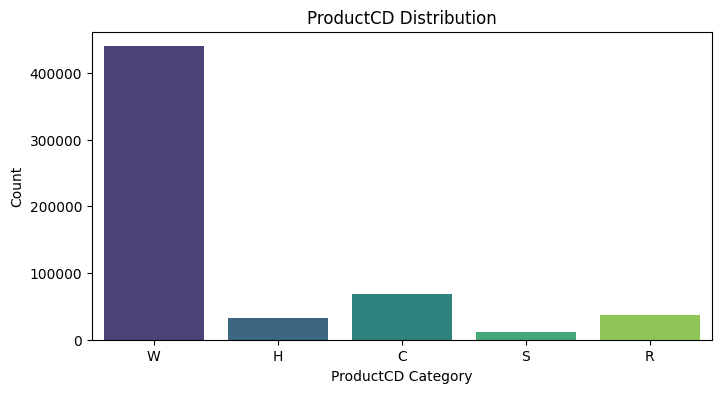

In [17]:
# Plot distribution for ProductCD
productcd_counts = train_transaction['ProductCD'].value_counts()
productcd_df = pd.DataFrame({'ProductCD': productcd_counts.index, 'Count': productcd_counts.values})
print(productcd_df)

plt.figure(figsize=(8, 4))
sns.countplot(data=train_transaction, x='ProductCD', palette='viridis')
plt.title('ProductCD Distribution')
plt.xlabel('ProductCD Category')
plt.ylabel('Count')
plt.show()

In [18]:
# Fraud proportion across ProductCD
fraud_rate_product = train_transaction.groupby('ProductCD')['isFraud'].mean()
print("Fraud Rate by ProductCD:")
print(fraud_rate_product)

Fraud Rate by ProductCD:
ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64


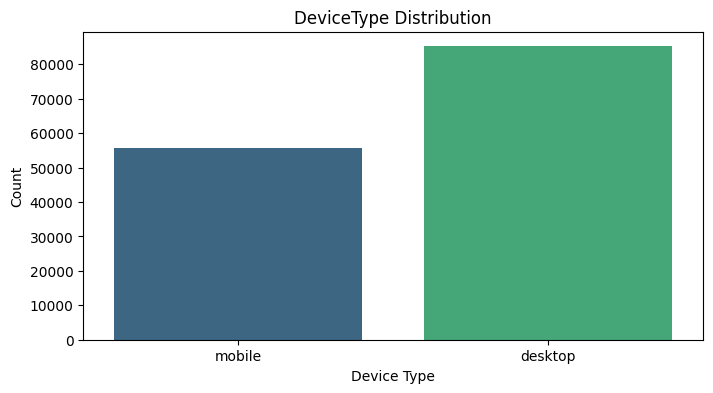

In [19]:
# Plot distribution for DeviceType
plt.figure(figsize=(8, 4))
sns.countplot(data=train_identity, x='DeviceType', palette='viridis')
plt.title('DeviceType Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

In [20]:
# Most common DeviceInfo values
print("Top 10 most common DeviceInfo values:")
train_identity['DeviceInfo'].value_counts().head(10)

Top 10 most common DeviceInfo values:


DeviceInfo
Windows                  47722
iOS Device               19782
MacOS                    12573
Trident/7.0               7440
rv:11.0                   1901
rv:57.0                    962
SM-J700M Build/MMB29K      549
SM-G610M Build/MMB29K      461
SM-G531H Build/LMY48B      410
rv:59.0                    362
Name: count, dtype: int64

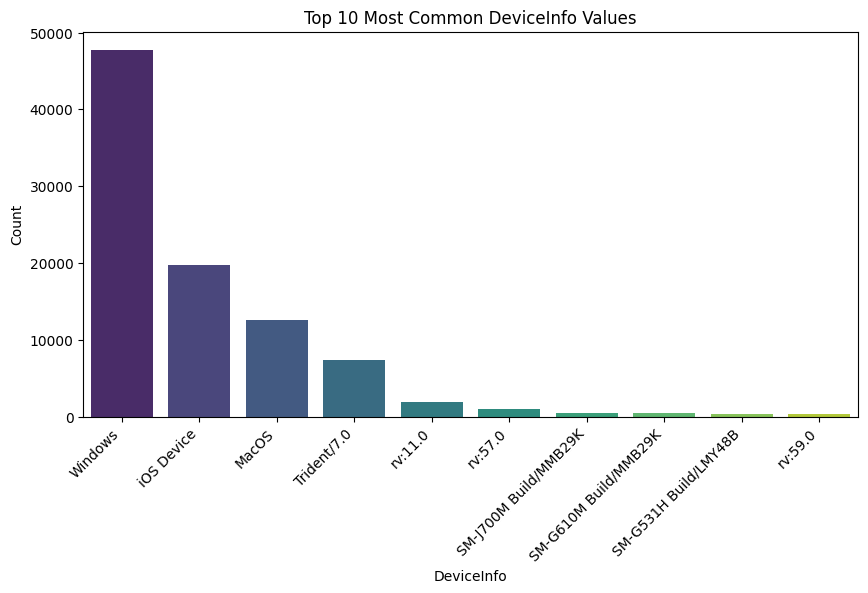

In [21]:
# Plotting the most common DeviceInfo values
plt.figure(figsize=(10, 5))
common_deviceinfo = train_identity['DeviceInfo'].value_counts().nlargest(10)
sns.barplot(x=common_deviceinfo.index, y=common_deviceinfo.values, palette='viridis')
plt.title('Top 10 Most Common DeviceInfo Values')
plt.xlabel('DeviceInfo')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

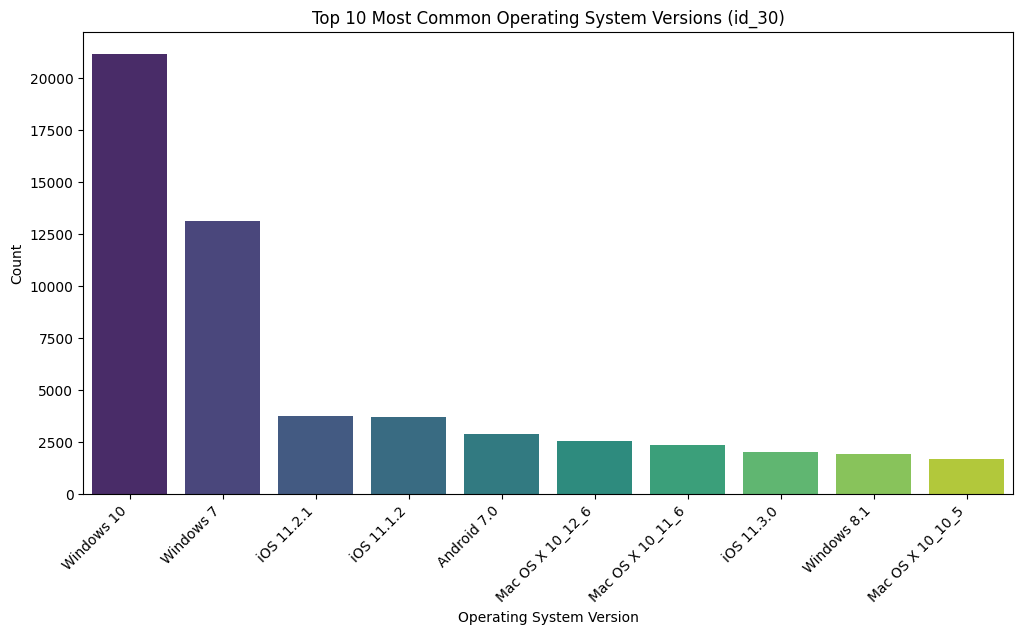

In [22]:
# Plotting distribution for id_30 (Operating System Version)
plt.figure(figsize=(12, 6))
os_version_counts = train_identity['id_30'].value_counts().nlargest(10)
sns.barplot(x=os_version_counts.index, y=os_version_counts.values, palette='viridis')
plt.title('Top 10 Most Common Operating System Versions (id_30)')
plt.xlabel('Operating System Version')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

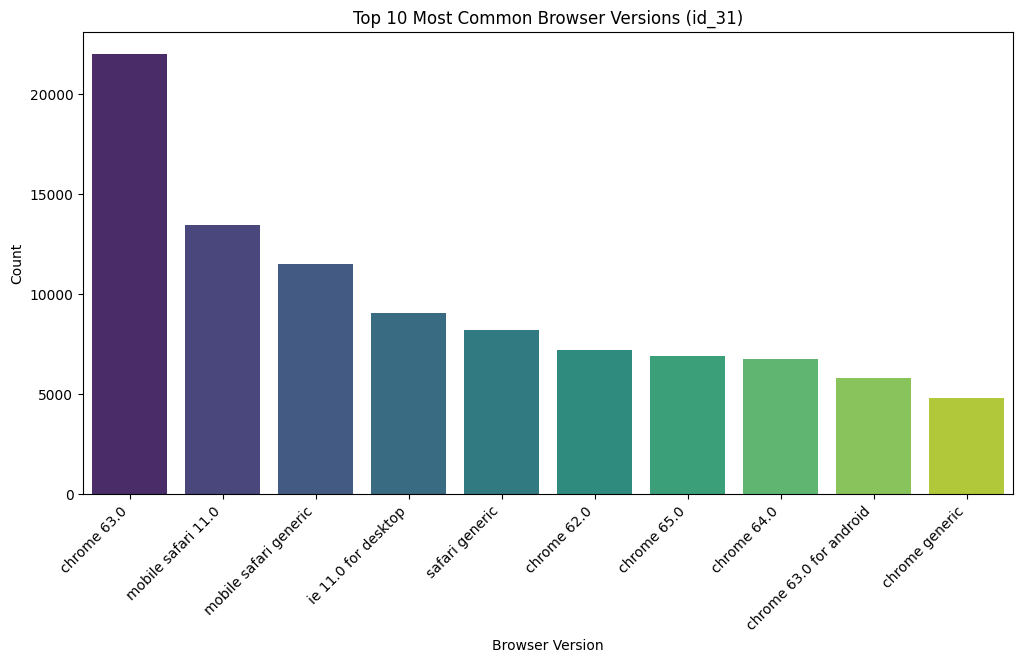

In [23]:
# Plotting distribution for id_31 (Browser Version)
plt.figure(figsize=(12, 6))
browser_version_counts = train_identity['id_31'].value_counts().nlargest(10)
sns.barplot(x=browser_version_counts.index, y=browser_version_counts.values, palette='viridis')
plt.title('Top 10 Most Common Browser Versions (id_31)')
plt.xlabel('Browser Version')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# Correlation between numerical features and isFraud
corr_matrix = train_transaction.select_dtypes(include=[np.number]).corr()
fraud_corr = corr_matrix['isFraud'].sort_values(ascending=False)

In [25]:
# Filter top correlated features
top_corr_features = fraud_corr[abs(fraud_corr) > 0.1]

In [26]:
# Display top correlated features with isFraud
print("Top correlated features with isFraud:")
print(top_corr_features.head(20))

Top correlated features with isFraud:
isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
V45        0.281832
V158       0.278066
V156       0.275952
V149       0.273282
V228       0.268861
V44        0.260376
V86        0.251828
V87        0.251737
V170       0.249794
V147       0.242894
Name: isFraud, dtype: float64


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


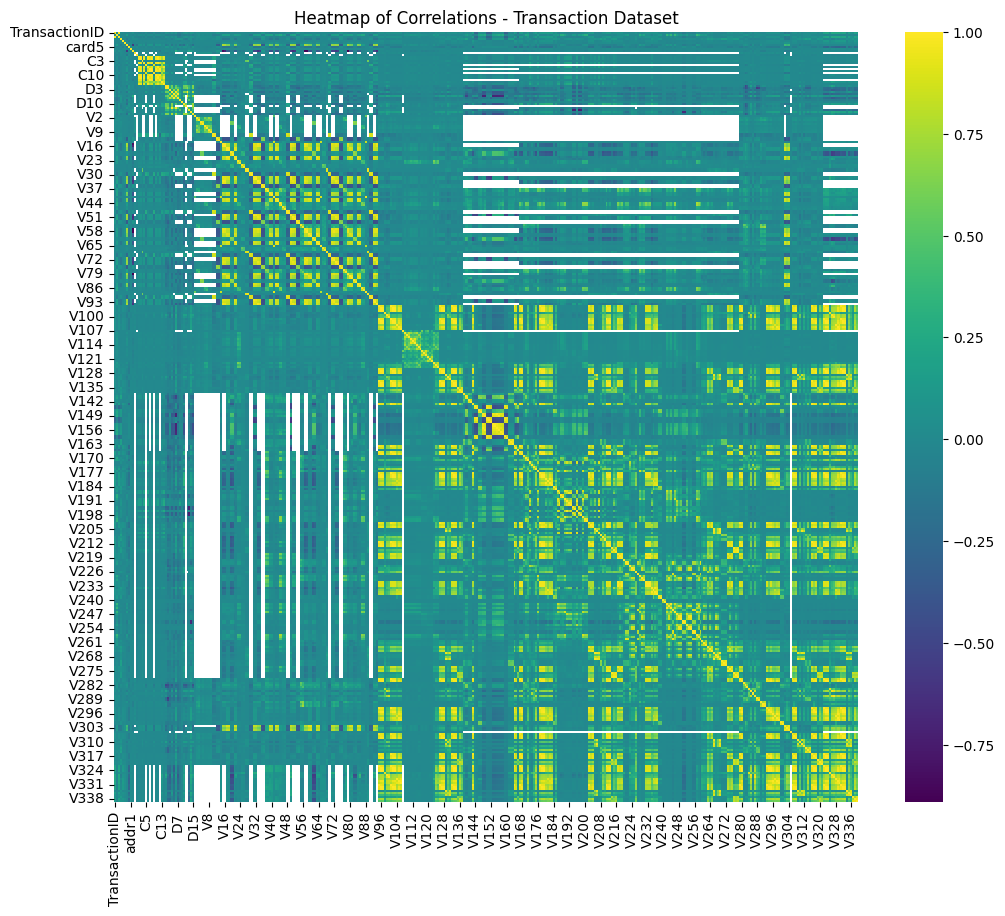

In [27]:
# Heatmap of correlations with isFraud
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False, cbar=True)
plt.title('Heatmap of Correlations - Transaction Dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


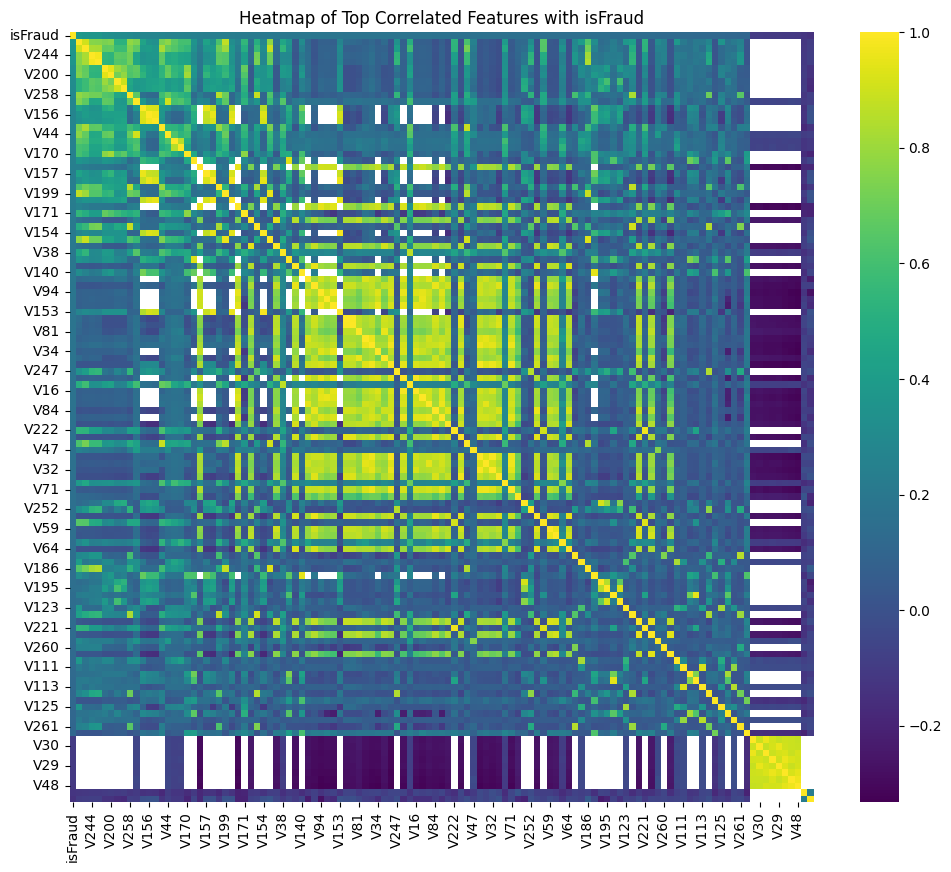

In [28]:
# Heatmap of top correlated features
plt.figure(figsize=(12, 10))
sns.heatmap(train_transaction[top_corr_features.index].corr(), cmap='viridis', annot=False, cbar=True)
plt.title('Heatmap of Top Correlated Features with isFraud')
plt.show()

In [29]:
train_merged = train_transaction.merge(train_identity, how='left', on='TransactionID').copy()
test_merged = test_transaction.merge(test_identity, how='left', on='TransactionID').copy()

In [30]:
# Correlation between numerical features and isFraud
corr_matrix_merged = train_merged.select_dtypes(include=[np.number]).corr()
fraud_corr_merged = corr_matrix_merged['isFraud'].sort_values(ascending=False)

In [31]:
# Filter top correlated features
top_corr_features_merged = fraud_corr_merged[abs(fraud_corr_merged) > 0.1]

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


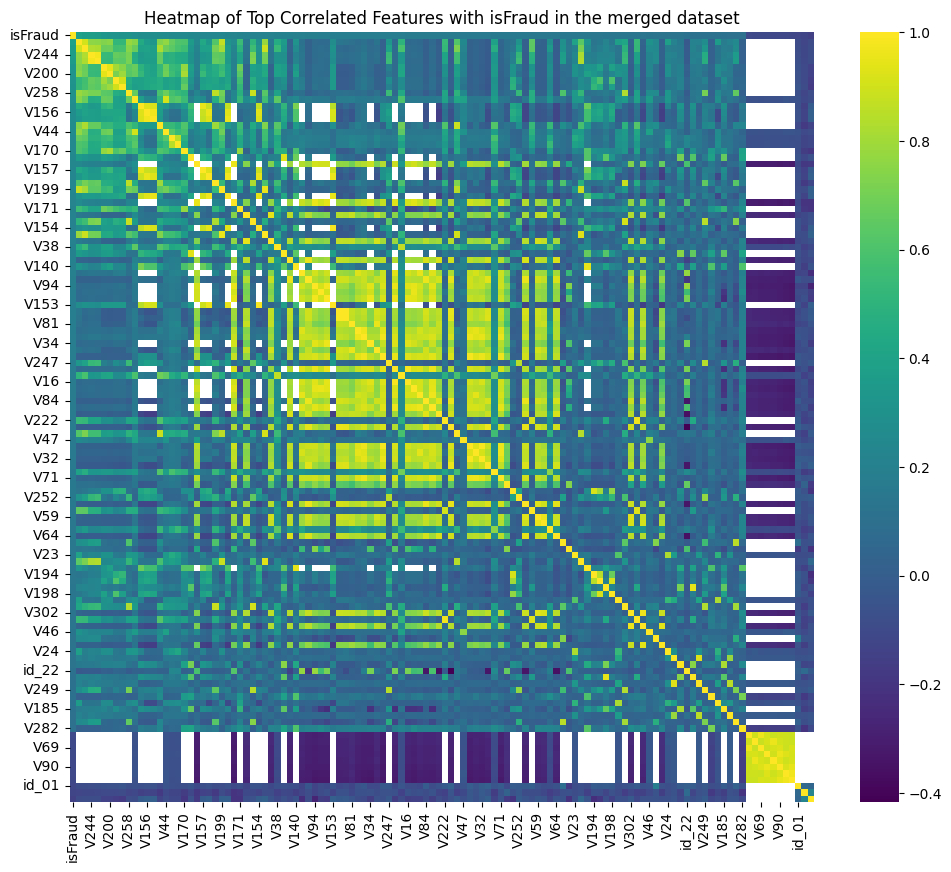

In [32]:
# Heatmap of top correlated features
plt.figure(figsize=(12, 10))
sns.heatmap(train_merged[top_corr_features_merged.index].corr(), cmap='viridis', annot=False, cbar=True)
plt.title('Heatmap of Top Correlated Features with isFraud in the merged dataset')
plt.show()

In [33]:
# Target encoding of ProductCD
productcd_target_mean = train_merged.groupby('ProductCD')['isFraud'].mean()
train_merged['ProductCD_encoded'] = train_merged['ProductCD'].map(productcd_target_mean)

# Correlation with isFraud
encoded_corr = train_merged[['ProductCD_encoded', 'isFraud']].corr()
print("Correlation between encoded ProductCD and isFraud:")
print(encoded_corr)

Correlation between encoded ProductCD and isFraud:
                   ProductCD_encoded   isFraud
ProductCD_encoded           1.000000  0.168376
isFraud                     0.168376  1.000000


In [34]:
from scipy.stats import chi2_contingency

# Chi-square test for ProductCD
contingency_table = pd.crosstab(train_merged['ProductCD'], train_merged['isFraud'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for ProductCD: chi2={chi2}, p-value={p}")

Chi-square test for ProductCD: chi2=16742.17152945829, p-value=0.0


In [35]:
# Handle missing values in DeviceType
train_merged['DeviceType'] = train_merged['DeviceType'].fillna('Unknown')

# Interaction feature between TransactionAmt and DeviceType
train_merged['Amt_Device_Interaction'] = train_merged['TransactionAmt'] * train_merged['DeviceType'].factorize()[0]
interaction_corr = train_merged[['Amt_Device_Interaction', 'isFraud']].corr()
print("Correlation between Amt_Device_Interaction and isFraud:")
print(interaction_corr)

Correlation between Amt_Device_Interaction and isFraud:
                        Amt_Device_Interaction   isFraud
Amt_Device_Interaction                1.000000  0.064113
isFraud                               0.064113  1.000000


[LightGBM] [Info] Number of positive: 20663, number of negative: 569877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.294263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38853
[LightGBM] [Info] Number of data points in the train set: 590540, number of used features: 403
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034990 -> initscore=-3.317076
[LightGBM] [Info] Start training from score -3.317076


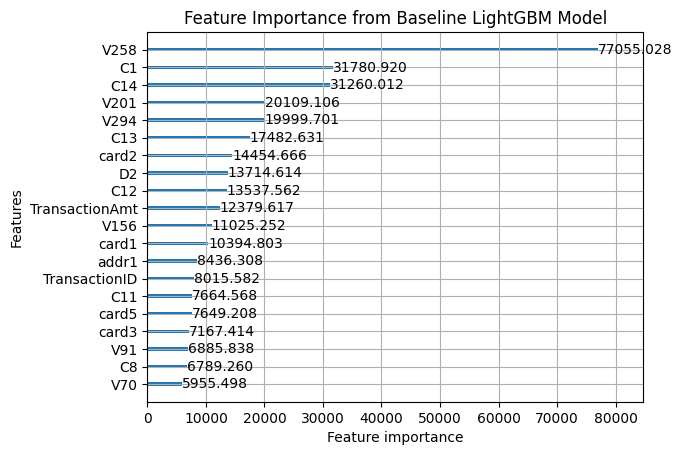

In [36]:
import lightgbm as lgb

# Prepare data for LightGBM
X = train_merged.select_dtypes(include=[np.number]).drop(columns=['isFraud'])
y = train_merged['isFraud']
dataset = lgb.Dataset(X, label=y)

# Train LightGBM model
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc'
}
model = lgb.train(params, dataset, num_boost_round=100)

# Plot feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.title('Feature Importance from Baseline LightGBM Model')
plt.show()